# Import data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
ano = np.load("anomalies.npy")
gt = np.load("test_set.npy")
gt_pred = np.load("predictions_on_test_set.npy")
ano_pred = np.load("predictions_on_anomalies.npy")

In [16]:
from scipy.ndimage import median_filter, gaussian_filter
gt_diff = (gt-gt_pred)**2
gt_ano_diff = (gt-ano)**2
ano_diff = (ano-ano_pred)**2

# Compute ROC curve / ROC-AUC score

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score
apply_on_images = lambda fun_2d, array:np.array([fun_2d(x) for x in array])
# only consider visible anomalies: criterion = more than 10 pixels over 0.5 in the |GT- ANO| image
true_ano_mask = apply_on_images(lambda im:np.sum(im[im>0.5])>10, gt_ano_diff)
true_ano_diff = ano_diff[true_ano_mask]
# define metrics
metrics = {"mean" : lambda im : np.mean(im),
           "size_over_05" : lambda im : np.sum(im[im>0.5])
          }

# compute metrics for negative (no anomaly) and positive (anomaly) examples
all_diff = np.concatenate([gt_diff, true_ano_diff], axis=0) # all images
all_diff_label = np.concatenate([np.zeros(shape=(gt_diff.shape[0],)), np.ones(shape=(true_ano_diff.shape[0],))]) # 0 -> no anomaly 1 -> anomaly

metrics_values = { metric_name:apply_on_images(metric, all_diff) for metric_name, metric in metrics.items()}
roc_curves = {metric_name:roc_curve(all_diff_label, values) for metric_name, values in metrics_values.items()}
roc_auc_scores = {metric_name:roc_auc_score(all_diff_label, values) for metric_name, values in metrics_values.items()}

# Display ROC

In [14]:
def disp_roc():
    for metric_name, (fpr, tpr, thresholds) in roc_curves.items():
        plt.plot(fpr, tpr, marker='.', label=metric_name+" (AUC: = %0.3f)" % roc_auc_scores[metric_name])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

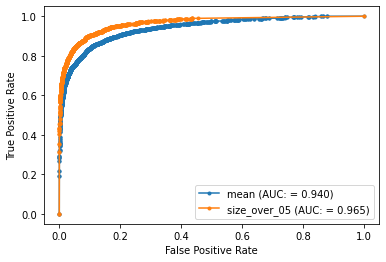

In [15]:
disp_roc()

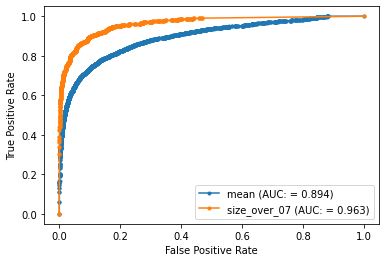

In [8]:
disp_roc() # metrics computed on absolute difference. 

# Display Images

In [ ]:

def disp_ano(idx, thld=0.7, filtered=False):
    ad = ano_diff_f if filtered else ano_diff
    gtad = gt_ano_diff_f if filtered else gt_ano_diff
    gtd = gt_diff_f if filtered else gt_diff
    vmin, vmax = ad[idx].min(), ad[idx].max()
    vmin_agt, vmax_agt = gtad[idx].min(), gtad[idx].max()
    vmin_gt, vmax_gt = gtd[idx].min(), gtd[idx].max()
    thld_a = np.sum(ad[idx]>thld)
    thld_agt = np.sum(gtad[idx]>thld)
    thld_gt = np.sum(gtd[idx]>thld)
    mean_a = np.mean(ad[idx])
    mean_agt = np.mean(gtad[idx])
    mean_gt = np.mean(gtd[idx])
    print("ano diff range: [{}; {}], thld: {}, mean: {}".format(vmin, vmax, thld_a, mean_a))
    print("ano gt diff range: [{}; {}], thld: {}, mean: {}".format(vmin_agt, vmax_agt, thld_agt, mean_agt))
    print("gt diff range: [{}; {}], thld: {}, mean: {}".format(vmin_gt, vmax_gt, thld_gt, mean_gt))
    plt.subplot(3, 3, 1)
    plt.title(label="GT")
    plt.imshow(gt[idx])
    plt.axis("off")
    plt.subplot(3, 3, 2)
    plt.title(label="GT Pred")
    plt.imshow(gt_pred[idx])
    plt.axis("off")
    plt.subplot(3, 3, 3)
    plt.title(label="GT Diff")
    plt.imshow(gtd[idx], vmin=thld, vmax=vmax)
    plt.axis("off")
    plt.subplot(3, 3, 4)
    plt.title(label="Ano")
    plt.imshow(ano[idx])
    plt.axis("off")
    plt.subplot(3, 3, 5)
    plt.title(label="Ano Pred")
    plt.imshow(ano_pred[idx])
    plt.axis("off")
    plt.subplot(3, 3, 6)
    plt.title(label="Ano Pred Diff")
    plt.imshow(ad[idx], vmin=thld, vmax=vmax)
    plt.axis("off")
    plt.subplot(3, 3, 7)
    plt.title(label="Ano Gt Diff")
    plt.imshow(gtad[idx], vmin=thld, vmax=vmax)
    plt.axis("off")

ano diff range: [1.5127231065004132e-12; 0.47862333059310913], thld: 20 mean 0.02010278031229973
ano gt diff range: [0.0; 0.5], thld: 9 mean 0.006008904427289963
gt diff range: [1.4421681080248328e-12; 0.14852768182754517], thld: 0 mean 0.008090355433523655


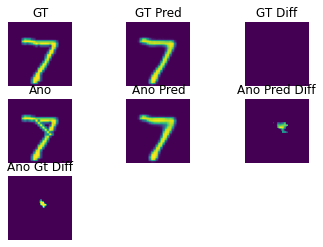

In [114]:
disp_ano(0)

ano diff range: [7.82560268756255e-13; 0.9442456960678101], thld: 31 mean 0.028295479714870453
ano gt diff range: [0.0; 0.9900000095367432], thld: 16 mean 0.01234618853777647
gt diff range: [7.623268878133305e-13; 0.7607787251472473], thld: 6 mean 0.014856329187750816


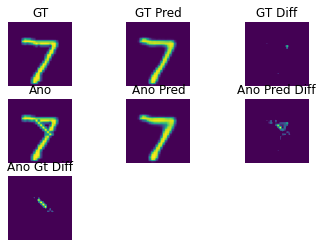

In [115]:
disp_ano(0, filtered= False)